ANÁLISE DE REGRESSÃO LINEAR: RENDA vs POUPANÇA

📊 DADOS ORIGINAIS:

Período  Poupança  Renda
 Jan/24      57.5  831.0
 Fev/24      65.4  893.5
 Mar/24      57.7  980.5
 Abr/24      86.1 1098.7
 Mai/24      93.4 1205.7
 Jun/24     100.3 1037.3
 Jul/24      93.0 1446.3
 Ago/24      87.9 1601.3
 Set/24     107.8 1807.9
 Out/24     123.3 2033.1
 Nov/24     153.8 2265.4
 Dez/24     191.8 2534.7

📈 RESULTADOS DO MODELO DE REGRESSÃO LINEAR

🎯 EQUAÇÃO DA RETA:
   Poupança = 7.0916 + 0.0639 × Renda

💰 RESPOSTA DA PERGUNTA:
   Para cada R$ 1,00 adicional de renda, a poupança aumenta em R$ 0.0639
   Ou seja: aproximadamente R$ 0.06 centavos

📊 QUALIDADE DO MODELO:
   • R² (Coeficiente de Determinação): 0.8554 (85.54%)
   • RMSE (Erro Quadrático Médio): R$ 14.36
   • MAE (Erro Absoluto Médio): R$ 11.85
   ✓ Bom ajuste. O modelo explica 85.5% da variação.

📈 ANÁLISES COMPLEMENTARES:
   • Propensão Marginal a Poupar: 0.0639 (6.39%)
   • Taxa de Poupança Média: 6.87%
   • Intercepto: R$ 7.09
     (Po

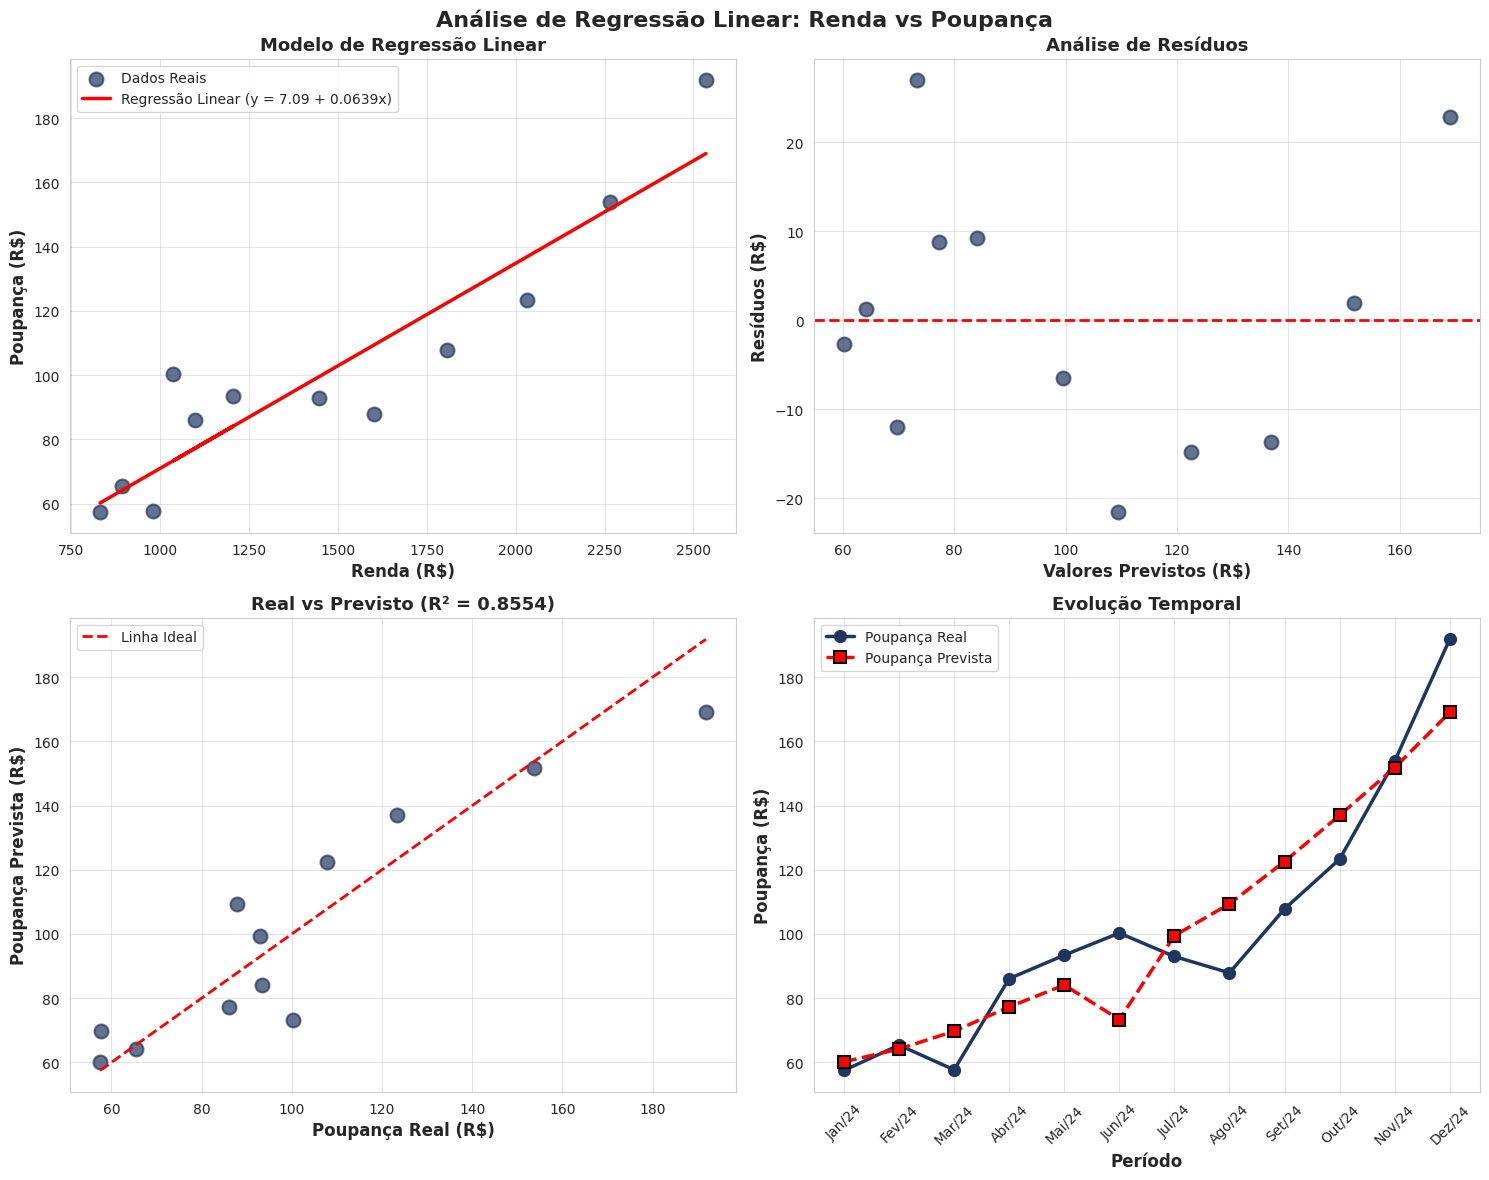


📝 CONCLUSÃO

A análise de regressão linear revelou que:

1. Para cada R$ 1,00 adicional de renda, a poupança aumenta em R$ 0.0639
   (aproximadamente 6.39 centavos).

2. O modelo apresenta um R² de 0.8554, indicando que 85.5% da variação
   na poupança pode ser explicada pela variação na renda.

3. A propensão marginal a poupar é de 6.39%, ou seja, de cada
   real adicional de renda, cerca de 6.39 centavos são poupados.

4. O modelo é bastante confiável para fazer previsões
   dentro do intervalo de renda observado (R$ 831.00 a R$ 2534.70).



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

# Configuração de estilo para gráficos com fundo branco
plt.style.use('default')
sns.set_style("whitegrid")

# Dados da planilha
dados = {
    'Período': ['Jan/24', 'Fev/24', 'Mar/24', 'Abr/24', 'Mai/24', 'Jun/24',
                'Jul/24', 'Ago/24', 'Set/24', 'Out/24', 'Nov/24', 'Dez/24'],
    'Poupança': [57.5, 65.4, 57.7, 86.1, 93.4, 100.3, 93.0, 87.9, 107.8, 123.3, 153.8, 191.8],
    'Renda': [831, 893.5, 980.5, 1098.7, 1205.7, 1037.3, 1446.3, 1601.3, 1807.9, 2033.1, 2265.4, 2534.7]
}

# Criando DataFrame
df = pd.DataFrame(dados)

print("=" * 70)
print("ANÁLISE DE REGRESSÃO LINEAR: RENDA vs POUPANÇA")
print("=" * 70)
print("\n📊 DADOS ORIGINAIS:\n")
print(df.to_string(index=False))

# Preparando dados para regressão
X = df[['Renda']].values  # Variável independente
y = df['Poupança'].values  # Variável dependente

# Criando e treinando o modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Fazendo previsões
y_pred = modelo.predict(X)

# Coeficientes do modelo
intercepto = modelo.intercept_
coeficiente = modelo.coef_[0]

# Métricas de avaliação
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = np.mean(np.abs(y - y_pred))

# Resultados
print("\n" + "=" * 70)
print("📈 RESULTADOS DO MODELO DE REGRESSÃO LINEAR")
print("=" * 70)
print(f"\n🎯 EQUAÇÃO DA RETA:")
print(f"   Poupança = {intercepto:.4f} + {coeficiente:.4f} × Renda")
print(f"\n💰 RESPOSTA DA PERGUNTA:")
print(f"   Para cada R$ 1,00 adicional de renda, a poupança aumenta em R$ {coeficiente:.4f}")
print(f"   Ou seja: aproximadamente R$ {coeficiente:.2f} centavos")

print(f"\n📊 QUALIDADE DO MODELO:")
print(f"   • R² (Coeficiente de Determinação): {r2:.4f} ({r2*100:.2f}%)")
print(f"   • RMSE (Erro Quadrático Médio): R$ {rmse:.2f}")
print(f"   • MAE (Erro Absoluto Médio): R$ {mae:.2f}")

if r2 > 0.9:
    print(f"   ✅ Excelente ajuste! O modelo explica {r2*100:.1f}% da variação.")
elif r2 > 0.7:
    print(f"   ✓ Bom ajuste. O modelo explica {r2*100:.1f}% da variação.")
else:
    print(f"   ⚠ Ajuste moderado. O modelo explica {r2*100:.1f}% da variação.")

# Análise adicional
propensao_poupar = (coeficiente / df['Renda'].mean()) * 100
taxa_poupanca_media = (df['Poupança'].mean() / df['Renda'].mean()) * 100

print(f"\n📈 ANÁLISES COMPLEMENTARES:")
print(f"   • Propensão Marginal a Poupar: {coeficiente:.4f} ({coeficiente*100:.2f}%)")
print(f"   • Taxa de Poupança Média: {taxa_poupanca_media:.2f}%")
print(f"   • Intercepto: R$ {intercepto:.2f}")
print(f"     (Poupança estimada quando renda = 0)")

# Tabela de previsões vs valores reais
print("\n" + "=" * 70)
print("📋 COMPARAÇÃO: VALORES REAIS vs PREVISTOS")
print("=" * 70)
df_resultado = df.copy()
df_resultado['Poupança Prevista'] = y_pred
df_resultado['Resíduo'] = y - y_pred
df_resultado['Erro %'] = (df_resultado['Resíduo'] / df_resultado['Poupança']) * 100

print(df_resultado[['Período', 'Renda', 'Poupança', 'Poupança Prevista', 'Resíduo', 'Erro %']].to_string(index=False))

# Exemplos práticos
print("\n" + "=" * 70)
print("💡 EXEMPLOS PRÁTICOS DE APLICAÇÃO")
print("=" * 70)
exemplos_renda = [1000, 1500, 2000, 2500, 3000]
print("\nSe a renda for:")
for renda_exemplo in exemplos_renda:
    poupanca_estimada = intercepto + coeficiente * renda_exemplo
    print(f"   R$ {renda_exemplo:,.2f} → Poupança estimada: R$ {poupanca_estimada:.2f}")

# Visualizações
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.patch.set_facecolor('white')
fig.suptitle('Análise de Regressão Linear: Renda vs Poupança', fontsize=16, fontweight='bold')

# Gráfico 1: Dispersão com linha de regressão
axes[0, 0].scatter(X, y, color=COR_PRINCIPAL, s=100, alpha=0.7, edgecolors='#1f3660', linewidths=1.5, label='Dados Reais')
axes[0, 0].plot(X, y_pred, color=COR_REGRESSAO, linewidth=2.5, label=f'Regressão Linear (y = {intercepto:.2f} + {coeficiente:.4f}x)')
axes[0, 0].set_xlabel('Renda (R$)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Poupança (R$)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Modelo de Regressão Linear', fontsize=13, fontweight='bold')
axes[0, 0].legend(loc='upper left')
axes[0, 0].grid(True, alpha=0.3, color='gray', linestyle='-', linewidth=0.5)
axes[0, 0].set_facecolor('white')

# Gráfico 2: Resíduos
residuos = y - y_pred
axes[0, 1].scatter(y_pred, residuos, color=COR_PRINCIPAL, s=100, alpha=0.7, edgecolors='#1f3660', linewidths=1.5)
axes[0, 1].axhline(y=0, color=COR_REGRESSAO, linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Valores Previstos (R$)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Resíduos (R$)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Análise de Resíduos', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, color='gray', linestyle='-', linewidth=0.5)
axes[0, 1].set_facecolor('white')

# Gráfico 3: Valores Reais vs Previstos
axes[1, 0].scatter(y, y_pred, color=COR_PRINCIPAL, s=100, alpha=0.7, edgecolors='#1f3660', linewidths=1.5)
axes[1, 0].plot([y.min(), y.max()], [y.min(), y.max()], color=COR_REGRESSAO, linestyle='--', linewidth=2, label='Linha Ideal')
axes[1, 0].set_xlabel('Poupança Real (R$)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Poupança Prevista (R$)', fontsize=12, fontweight='bold')
axes[1, 0].set_title(f'Real vs Previsto (R² = {r2:.4f})', fontsize=13, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, color='gray', linestyle='-', linewidth=0.5)
axes[1, 0].set_facecolor('white')

# Gráfico 4: Evolução temporal
axes[1, 1].plot(df['Período'], df['Poupança'], marker='o', linewidth=2.5, markersize=8, 
                label='Poupança Real', color=COR_PRINCIPAL, markeredgecolor='#1f3660', markeredgewidth=1.5)
axes[1, 1].plot(df['Período'], y_pred, marker='s', linewidth=2.5, markersize=8, 
                label='Poupança Prevista', color=COR_REGRESSAO, linestyle='--', markeredgecolor='black', markeredgewidth=1.5)
axes[1, 1].set_xlabel('Período', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Poupança (R$)', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Evolução Temporal', fontsize=13, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, color='gray', linestyle='-', linewidth=0.5)
axes[1, 1].set_facecolor('white')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Conclusão
print("\n" + "=" * 70)
print("📝 CONCLUSÃO")
print("=" * 70)
print(f"""
A análise de regressão linear revelou que:

1. Para cada R$ 1,00 adicional de renda, a poupança aumenta em R$ {coeficiente:.4f}
   (aproximadamente {coeficiente*100:.2f} centavos).

2. O modelo apresenta um R² de {r2:.4f}, indicando que {r2*100:.1f}% da variação
   na poupança pode ser explicada pela variação na renda.

3. A propensão marginal a poupar é de {coeficiente*100:.2f}%, ou seja, de cada
   real adicional de renda, cerca de {coeficiente*100:.2f} centavos são poupados.

4. O modelo é {"bastante confiável" if r2 > 0.8 else "moderadamente confiável"} para fazer previsões
   dentro do intervalo de renda observado (R$ {df['Renda'].min():.2f} a R$ {df['Renda'].max():.2f}).
""")
print("=" * 70)
